# A Visual History of Nobel Prize Winners

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/projects/nobel_prize_history/notebook.ipynb)

**Contents**
- [The Most Nobel of Prizes](#The-Most-Nobel-of-Prizes)
- [Who Gets the Nobel Prize](#Who-Gets-the-Nobel-Prize)
- [USA Dominance](#USA-Dominance)
- [USA Dominance Visualized](#USA-Dominance-Visualized)
- [What is the Gender of a Typical Nobel Prize Winner](#What-is-the-Gender-of-a-Typical-Nobel-Prize-Winner)
- [The First Woman to Win the Nobel Prize](#The-First-Woman-to-Win-the-Nobel-Prize)
- [Repeat Laureates](#Repeat-Laureates)
- [How Old are You When You Get the Prize](#How-Old-are-You-When-You-Get-the-Prize)
- [Age Differences between Prize Categories](#Age-Differences-between-Prize-Categories)
- [Oldest and Youngest Winners](#Oldest-and-Youngest-Winners)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter

BASE_URL = "https://raw.githubusercontent.com/adamelliotfields/datacamp/main/notebooks/projects/nobel_prize_history/"

pd.set_option("display.width", 200)

nobel = pd.read_csv(BASE_URL + "nobel.csv")

## The Most Nobel of Prizes

The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?

Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.

In [2]:
display(nobel.head(6))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## Who Gets the Nobel Prize

Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?

(For _country_, we will use the `birth_country` of the winner, as the `organization_country` is `NaN` for all shared Nobel Prizes.)

In [3]:
# number of prizes (possibly shared) awarded between 1901 and 2016
print(len(nobel))

911


In [4]:
# number of prizes won by male and female recipients
print(nobel["sex"].value_counts())

sex
Male      836
Female     49
Name: count, dtype: int64


In [5]:
# number of prizes won by the top 10 nationalities
print(nobel["birth_country"].value_counts().head(10))

birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: count, dtype: int64


## USA Dominance

Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

In [6]:
# proportion of USA-born winners per decade
nobel["usa_born_winner"] = nobel["birth_country"] == "United States of America"
nobel["decade"] = (np.floor(nobel["year"] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## USA Dominance Visualized

A table is OK, but to _see_ when the USA started to dominate the Nobel charts we need a plot!

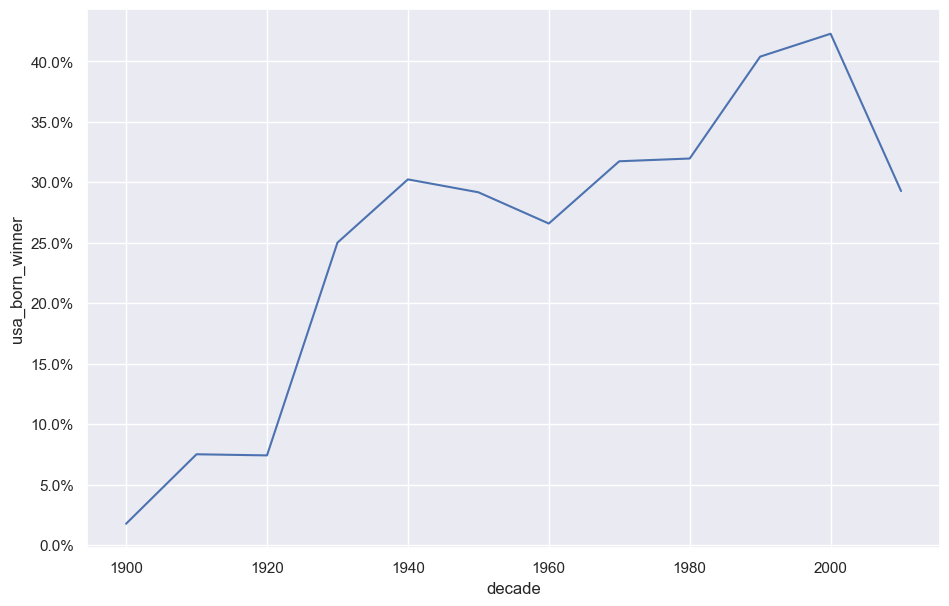

In [7]:
sns.set()
plt.rcParams["figure.figsize"] = [11, 7]
ax = sns.lineplot(x="decade", y="usa_born_winner", data=prop_usa_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

## What is the Gender of a Typical Nobel Prize Winner

So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are _men_. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

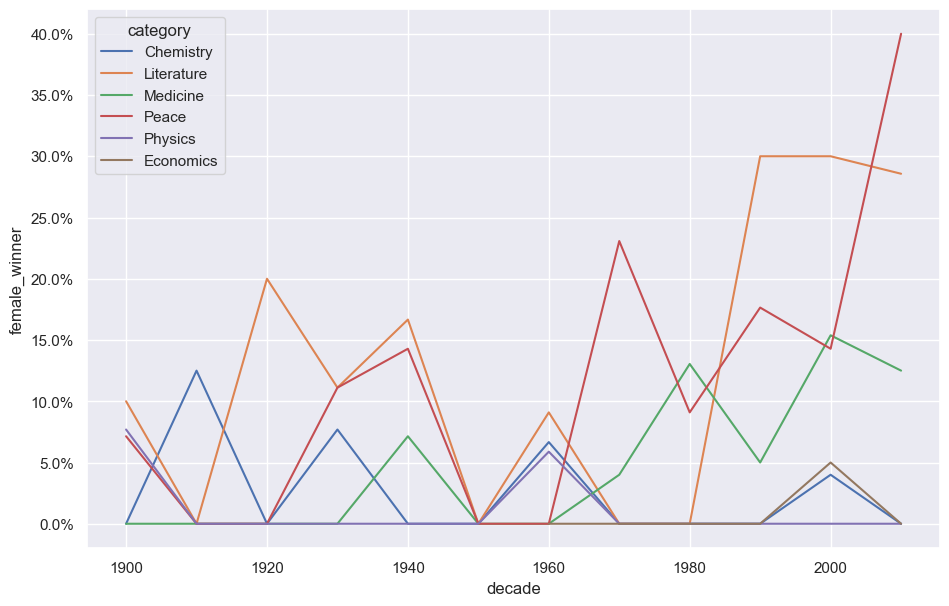

In [8]:
# proportion of female laureates per decade
nobel["female_winner"] = nobel["sex"] == "Female"
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# plot female winners with % on the y-axis
ax = sns.lineplot(x="decade", y="female_winner", hue="category", data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## The First Woman to Win the Nobel Prize

The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.

Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [9]:
# select only the rows of "Female" winners in `nobel`
# use `nsmallest()` to select the first woman
first_woman = nobel[nobel.sex == "Female"].nsmallest(1, "year")
display(first_woman)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## Repeat Laureates

For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few?

In [10]:
# group by `full_name`
repeat_winners = nobel.groupby("full_name").filter(lambda group: len(group) >= 2)
display(repeat_winners.head())

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False


## How Old are You When You Get the Prize

The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.

But how old are you generally when you get the prize?

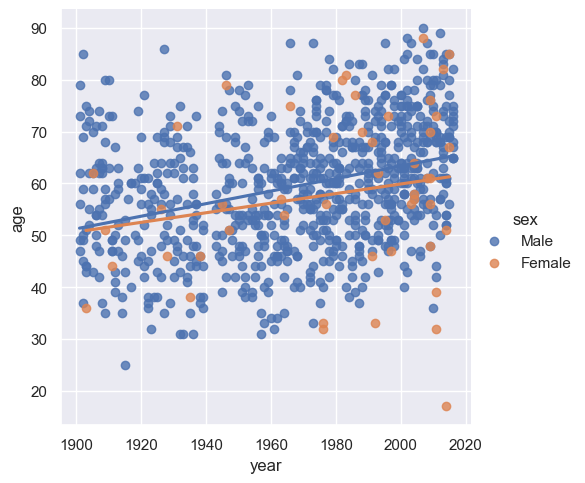

In [11]:
# convert to datetime
nobel["birth_date"] = pd.to_datetime(nobel["birth_date"])

# calculate the age of Nobel Prize winners
nobel["age"] = nobel["year"] - nobel["birth_date"].dt.year

# plot linear regression of `year` vs `age`
sns.lmplot(x="year", y="age", data=nobel, hue="sex", ci=None)
plt.show()

## Age Differences between Prize Categories

The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).

Let's look at age trends within different prize categories.

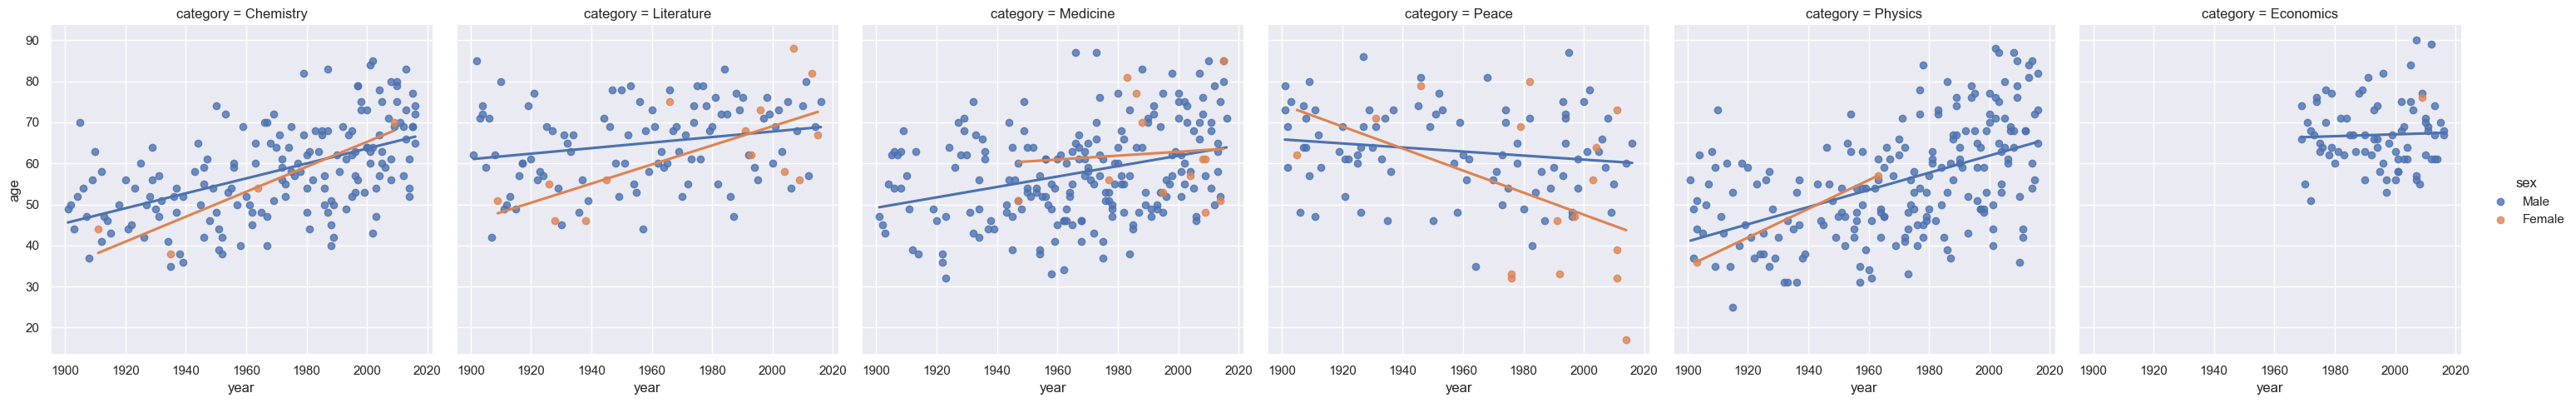

In [12]:
# same plot as previous cell, but separate plots for each type of Nobel Prize
sns.lmplot(x="year", y="age", col="category", data=nobel, hue="sex", ci=None)
plt.show()

## Oldest and Youngest Winners

More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!

In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

In [13]:
# oldest winner using `nlargest()`
oldest_winner = nobel.nlargest(1, "age")
display(oldest_winner)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


In [14]:
# youngest winner using `nsmallest()`
youngest_winner = nobel.nsmallest(1, "age")
display(youngest_winner)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
